In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

In [2]:
beatles_5_5 = nx.read_edgelist("./SAN-beatles-5-5-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
beatles_5_10 = nx.read_edgelist("./SAN-beatles-5-10-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])
beatles_10_5 = nx.read_edgelist("./SAN-beatles-10-5-EL.csv", delimiter="\t", nodetype=str, create_using=nx.DiGraph(), data=[('rank', float),])


In [3]:
print(beatles_5_5.number_of_nodes())
print(beatles_5_5.number_of_edges())
print(beatles_5_10.number_of_nodes())
print(beatles_5_10.number_of_edges())
print(beatles_10_5.number_of_nodes())
print(beatles_10_5.number_of_edges())

372
1025
3561
11915
3678
16810


In [4]:
beatles_5_5_na = pd.read_csv("./SAN-beatles-5-5-NA.csv", delimiter="\t")
beatles_5_10_na = pd.read_csv("./SAN-beatles-5-10-NA.csv", delimiter="\t")
beatles_10_5_na = pd.read_csv("./SAN-beatles-10-5-NA.csv", delimiter="\t")

In [5]:
labels = beatles_5_5_na.columns

In [6]:
iter = 0

for ID in beatles_5_5_na["id"]:

    for feature in labels:

        cat = beatles_5_5_na[feature][iter]
        
        if type(cat) is str:
            beatles_5_5.node[ID][feature] = cat
            
        if not type(cat) is float or not math.isnan(cat):
            beatles_5_5.node[ID][feature] = cat
        
    iter += 1
    
found = False
total = 0
for ID in beatles_5_5.nodes():
    found = False
    for match in beatles_5_5_na["id"]:
        if match == ID:
            found = True
    if not found:
        beatles_5_5.remove_node(ID)
        total += 1

print(total)

167


In [7]:
iter = 0

for ID in beatles_5_10_na["id"]:

    for feature in labels:

        cat = beatles_5_10_na[feature][iter]
        
        if type(cat) is str:
            beatles_5_10.node[ID][feature] = cat
            
        if not type(cat) is float or not math.isnan(cat):
            beatles_5_10.node[ID][feature] = cat
        
    iter += 1
    
found = False
total = 0
for ID in beatles_5_10.nodes():
    found = False
    for match in beatles_5_10_na["id"]:
        if match == ID:
            found = True
    if not found:
        beatles_5_10.remove_node(ID)
        total += 1

print(total)

1178


In [8]:
iter = 0

for ID in beatles_10_5_na["id"]:

    for feature in labels:

        cat = beatles_10_5_na[feature][iter]
        
        if type(cat) is str:
            beatles_10_5.node[ID][feature] = cat
            
        if not type(cat) is float or not math.isnan(cat):
            beatles_10_5.node[ID][feature] = cat
        
    iter += 1
    
found = False
total = 0
for ID in beatles_10_5.nodes():
    found = False
    for match in beatles_10_5_na["id"]:
        if match == ID:
            found = True
    if not found:
        beatles_10_5.remove_node(ID)
        total += 1

print(total)

1997


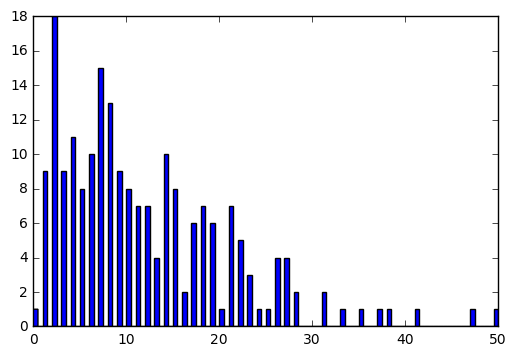

In [9]:
in_degrees_beatles_5_5 = beatles_5_5.in_degree(weight="rank")

in_degrees_beatles_5_5_dist = []
for v in in_degrees_beatles_5_5.values():
    in_degrees_beatles_5_5_dist.append(v)
    
_ = plt.hist(in_degrees_beatles_5_5_dist, bins=100)

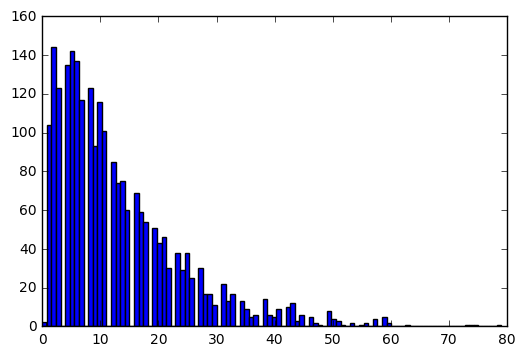

In [10]:
in_degrees_beatles_5_10 = beatles_5_10.in_degree(weight="rank")

in_degrees_beatles_5_10_dist = []
for v in in_degrees_beatles_5_10.values():
    in_degrees_beatles_5_10_dist.append(v)
    
_ = plt.hist(in_degrees_beatles_5_10_dist, bins=100)

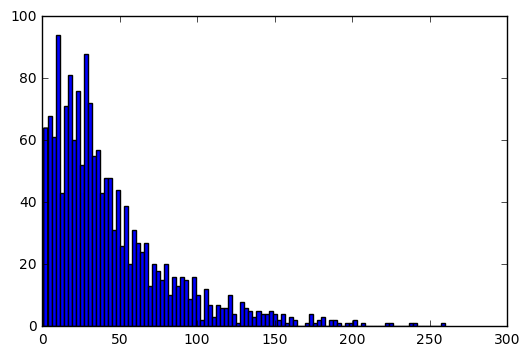

In [11]:
in_degrees_beatles_10_5 = beatles_10_5.in_degree(weight="rank")

in_degrees_beatles_10_5_dist = []
for v in in_degrees_beatles_10_5.values():
    in_degrees_beatles_10_5_dist.append(v)
    
_ = plt.hist(in_degrees_beatles_10_5_dist, bins=100)

In [12]:
pop = 0
num = 0
for k,v in in_degrees_beatles_10_5.items():
    if v > 200:
        print(beatles_10_5.node[k])
        print("\n")
        pop += beatles_10_5.node[k]["popularity"]
        num += 1
print(pop/num)

{'artist': 'The Searchers', 'genre4': 'british invasion', 'genre2': 'brill building pop', 'followers': '12228', 'popularity': 44, 'id': '4QmkLL9JOqM9dusHS1Hghe', 'genre1': 'adult standards', 'level': 2, 'genre5': 'bubblegum pop', 'genre3': 'british blues'}


{'artist': 'Savoy Brown', 'genre4': 'british blues', 'genre2': 'blues', 'followers': '9824', 'popularity': 39, 'id': '17obwOahRWI121iMUZznh2', 'genre1': 'album rock', 'level': 4, 'genre5': 'chicago blues', 'genre3': 'bluesrock'}


{'artist': 'Alan Silvestri', 'genre2': 'soundtrack', 'followers': '57919', 'popularity': 60, 'id': '0Xk15jHKly4c3AhPr5vjoA', 'genre1': 'scorecore', 'level': 4, 'genre3': 'video game music'}


{'artist': 'The Yardbirds', 'genre4': 'bluesrock', 'genre2': 'art rock', 'followers': '61941', 'popularity': 51, 'id': '2lxX1ivRYp26soIavdG9bX', 'genre1': 'album rock', 'level': 2, 'genre5': 'brill building pop', 'genre3': 'blues'}


{'artist': 'Gary Lewis & The Playboys', 'genre4': 'bubblegum pop', 'genre2': 'brill 

In [14]:
genres_b_5_5 = []

def addGenre(genre):
    if type(genre) is str:
        genres_b_5_5.append(genre)
beatles_5_10_na.genre1.apply(addGenre)
beatles_5_10_na.genre2.apply(addGenre)
beatles_5_10_na.genre3.apply(addGenre)
beatles_5_10_na.genre4.apply(addGenre)
beatles_5_10_na.genre5.apply(addGenre)

random.shuffle(genres10)